# Serial biases as in [Stein et al. (2020)](https://doi.org/10.1038/s41467-020-18033-3)

In [26]:
import pandas as pd
import numpy as np

In [27]:
print(pd.__version__)

1.3.4


Calculate serial biases for each subject and condition based on raw data (location of mouse click responses in each trial):

In [28]:
import helpers as hf
import statsmodels.formula.api as smf

alldat = pd.read_pickle("data/rawdat_all.pkl")

# serial bias parameters for sliding average
window      = np.pi/3
step        = np.pi/30

dat    = alldat.groupby(['group','subject','session','delay']).apply(lambda x: \
          np.degrees(hf.folded_bias(x.prevcurr.values, x.error.values, window, step)[0])).reset_index()


In [29]:
dat.loc[dat['delay']=='60', 'delay'] = '1'
dat.loc[dat['delay']=='180', 'delay'] = '3'

In [30]:
dat

,group,subject,session,delay,0
0,C,C03,4,0,"[0.00776900548542082, 0.10190519100958, 0.1517..."
1,C,C03,4,3,"[0.030219478162096206, 0.5623991149513637, 0.8..."
2,C,C03,4,1,"[-0.137800220422917, -0.22384173653258269, -0...."
3,C,C05,1,0,"[0.11954280544401191, 0.027153662613722648, -0..."
4,C,C05,1,3,"[1.4535057949229555, 1.1912377107990704, 2.371..."
...,...,...,...,...,...
379,S,S21,1,3,"[0.046217366811081635, -0.20149970575644421, 0..."
380,S,S21,1,1,"[-0.09056387835962067, -0.21726152987132188, -..."
381,S,S22,1,0,"[1.1586017543825533, -0.792310920320291, -0.26..."
382,S,S22,1,3,"[0.08953972689012805, -0.04473050404234532, -1..."


Now compute the mean of the curves for angles<90º as an overall measure of serial bias:

In [31]:
angles=np.linspace(0,360,len(dat[0][0]), endpoint=False)
dat['SB'] = [np.mean(dat[0][s][angles<90]) for s in range(len(dat[0]))]
dat = dat.drop(columns=[0]).reset_index(drop=True)
dat

,group,subject,session,delay,SB
0,C,C03,4,0,-0.037883
1,C,C03,4,3,0.830285
2,C,C03,4,1,-0.489773
3,C,C05,1,0,-0.097955
4,C,C05,1,3,1.690678
...,...,...,...,...,...
379,S,S21,1,3,0.425890
380,S,S21,1,1,-0.319232
381,S,S22,1,0,0.230486
382,S,S22,1,3,0.481917


Serial bias grows with delay, in the control group:

<AxesSubplot:xlabel='SB', ylabel='Probability'>

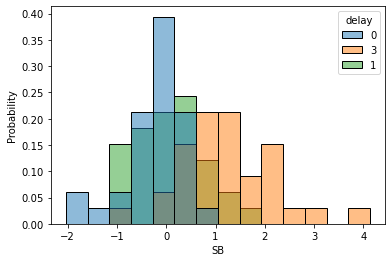

In [38]:
sns.histplot(data=dat[dat['group']=='C'], x='SB', hue='delay', stat='probability', common_norm=False)

At long delays, controls have more serial biases than the other two groups:

<AxesSubplot:xlabel='SB', ylabel='Probability'>

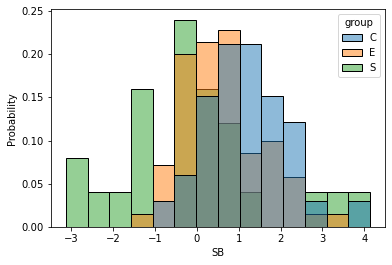

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(data=dat[dat['delay']=='3'], x='SB', hue='group', stat='probability', common_norm=False)
